# A Case Study of TOI-1858

[exofop link](https://exofop.ipac.caltech.edu/tess/target.php?id=424733642)

- Download Data
- Pick good sector data
- Preprocess data
- Fold curve

In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lightkurve import search_targetpixelfile

%matplotlib inline

In [2]:
# TIC 424733642 -- TOI-1858
tpf = search_targetpixelfile("TIC 424733642").download_all()

In [3]:
[t.meta['SECTOR'] for t in tpf]

[50, 23, 50]

In [4]:
tpf[2].interact(notebook_url='localhost:8889')

<Axes: title={'center': 'Target ID: 424733642, Cadence: 207156'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

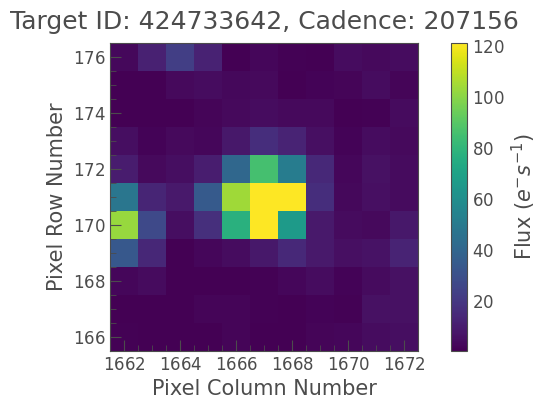

In [5]:
t0 = tpf[0]
t1 = tpf[1]
t2 = tpf[2]
t2.plot(frame=110)

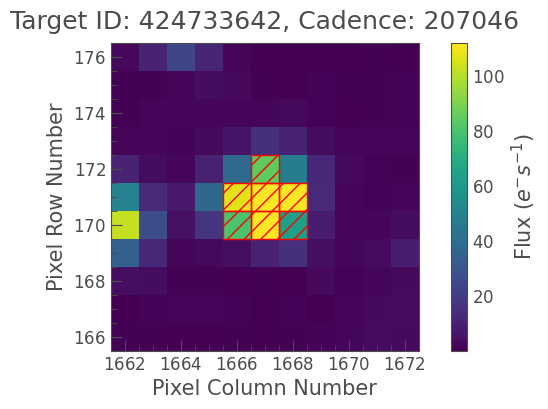

In [7]:
# Show the pipeline_mask
t2.plot(aperture_mask=t2.pipeline_mask);

In [8]:
lc0 = t0.to_lightcurve(aperture_mask='pipeline');
lc1 = t1.to_lightcurve(aperture_mask='pipeline');
lc2 = t2.to_lightcurve(aperture_mask='pipeline');

Text(0.5, 1.0, 'Raw Light Curve of Sector 50_1')

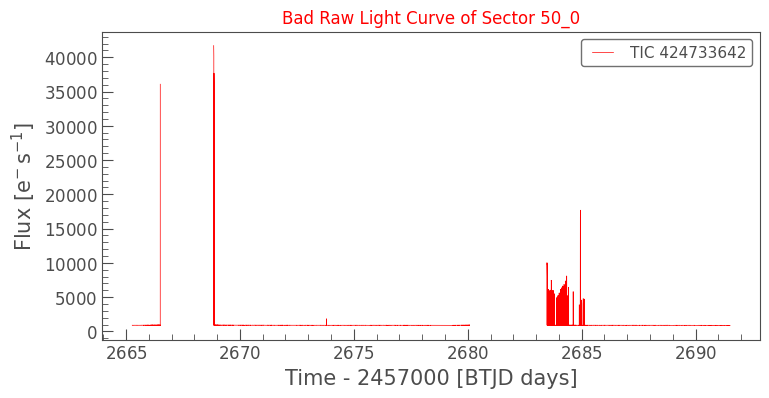

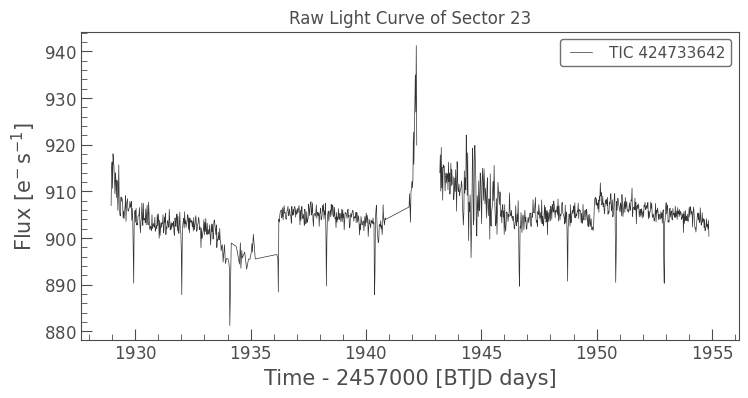

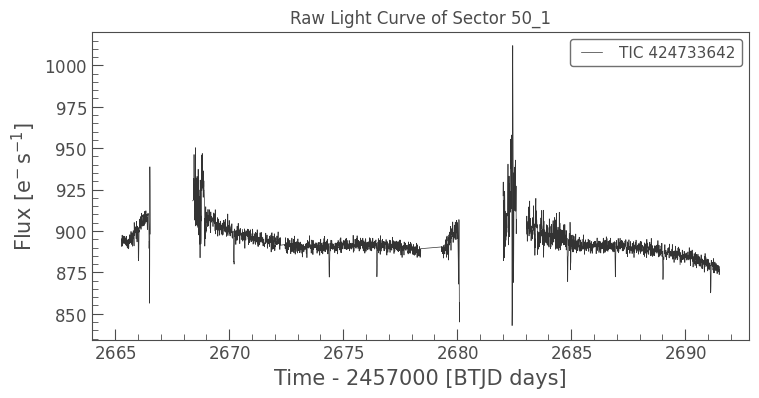

In [9]:
# There are 3 sectors, but the first sector(50) does not seem to have good data.
lc0.plot(color='r')
plt.title("Bad Raw Light Curve of Sector 50_0", color='r')
lc1.plot()
plt.title("Raw Light Curve of Sector 23")
lc2.plot()
plt.title("Raw Light Curve of Sector 50_1")

Text(0.5, 1.0, 'Combined Processed Light Curve for Sector 23 and 50_1')

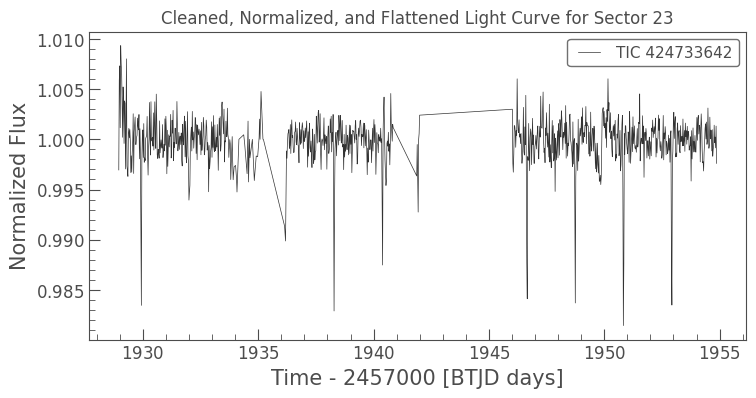

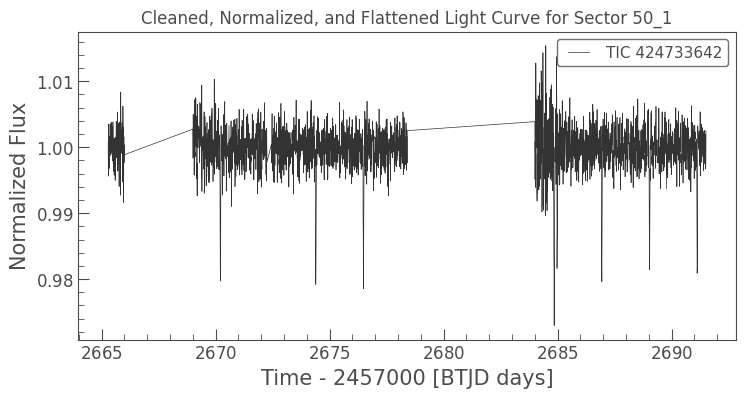

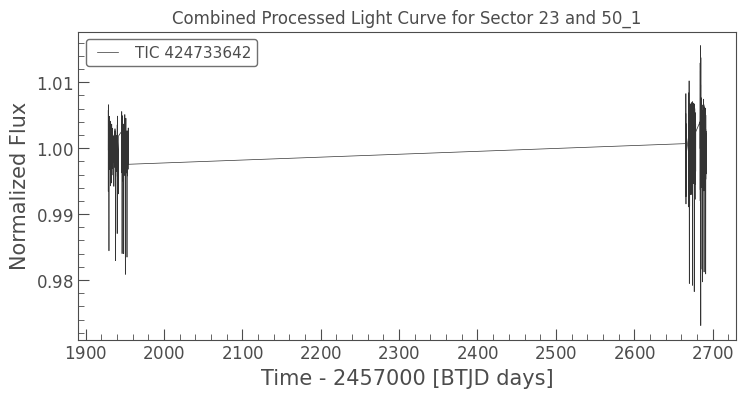

In [10]:
mask1 = (lc1.time.value<1942) | (lc1.time.value > 1946)
lc1_clean = lc1[mask1]
lc1_clean = lc1_clean.remove_outliers(sigma=5)
lc1_clean = lc1_clean.normalize()
lc1_clean = lc1_clean.flatten()
lc1_clean.plot()
plt.title("Cleaned, Normalized, and Flattened Light Curve for Sector 23")


mask2 = (lc2.time.value<2666) | ((lc2.time.value > 2669) & (lc2.time.value < 2679)) | (lc2.time.value >2684)
lc2_clean = lc2[mask2]
lc2_clean = lc2_clean.remove_outliers(sigma=5)
lc2_clean = lc2_clean.normalize()
lc2_clean = lc2_clean.flatten()
lc2_clean.plot()
plt.title("Cleaned, Normalized, and Flattened Light Curve for Sector 50_1")

lc_combined_clean = lc1_clean.append(lc2_clean)
lc_combined_clean = lc_combined_clean.flatten()
lc_combined_clean.plot()
plt.title("Combined Processed Light Curve for Sector 23 and 50_1")

Text(0.5, 1.0, 'Periodogram of the Combined Light Curve')

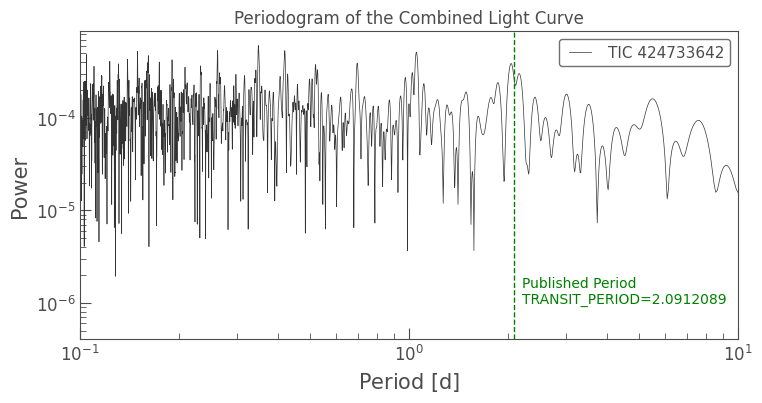

In [11]:
# Published transit period
TRANSIT_PERIOD = 2.0912089

pg = lc_combined_clean.to_periodogram(oversample_factor=1)
pg.plot(view='period', scale='log')
plt.xlim(0.1, 10)
plt.axvline(x=TRANSIT_PERIOD, color='g', linestyle='--', linewidth=1)
plt.text(x=2.2, y=15e-7, s='Published Period', fontsize=10, color='g')
plt.text(x=2.2, y=10e-7, s='TRANSIT_PERIOD=2.0912089', fontsize=10, color='g')
plt.title("Periodogram of the Combined Light Curve")

Text(0.5, 1.0, 'Folded Light Curve with Published Period (2.0912089 Days)')

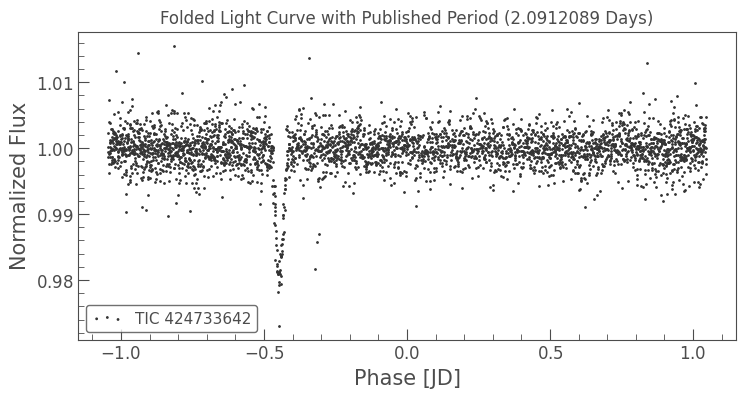

In [12]:
# Plot the folded curve.
folded_lc = lc_combined_clean.fold(period=TRANSIT_PERIOD, epoch_phase=1945.5)
folded_lc.scatter();
plt.title(f"Folded Light Curve with Published Period ({TRANSIT_PERIOD} Days)")

Text(0.5, 1.0, 'Binned Light Curve')

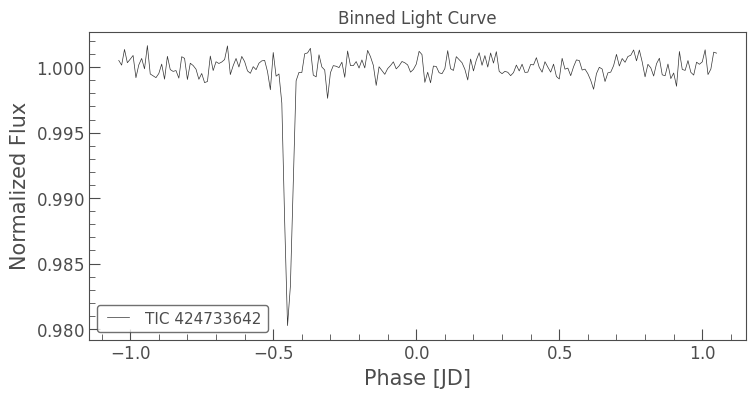

In [13]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot()
plt.title("Binned Light Curve")